# C21: Project: Image Classification With CNN

For Summary

## 0. Preparation

In [1]:
import numpy as np
from keras.utils import np_utils
from matplotlib import pyplot as plt
%matplotlib inline

Using Theano backend.


## 1. Load CIFAR-10 Dataset

### What is CIFAT-10 Dataset

The CIFAR-10 dataset consists of 60,000 photos divided into 10 classes (hence the name CIFAR-10)1. Classes include common objects such as airplanes, automobiles, birds, cats and so on. The dataset is split in a standard way, where 50,000 images are used for training a model and the remaining 10,000 for evaluating its performance. The photos are in color with red, green and blue channels, but are small measuring 32x32 pixel squares.

State-of-the-art results can be achieved using very large convolutional neural networks. You can learn about state-of-the-art results on CIFAR-10 on Rodrigo Benenson’s webpage2. Model performance is reported in classification accuracy, with very good performance above 90% with human performance on the problem at 94% and state-of-the-art results at 96% at the time of writing.

### Download CIFAR-10 By Keras

Keras has the facility to automatically download CIFAR-10 dataset, and store in the ~/.keras/datasets/ directory when using the cifar10.load_data() function at the first time. The dataset is about 164Mb.

In [2]:
from keras.datasets import cifar10

# load dataset
(X_train, Y_train), (X_val, Y_val) = cifar10.load_data()

print X_train.shape, X_train.dtype
print Y_train.shape, Y_train.dtype

(50000, 3, 32, 32) uint8
(50000, 1) uint8


Show some images in CIFAR-10

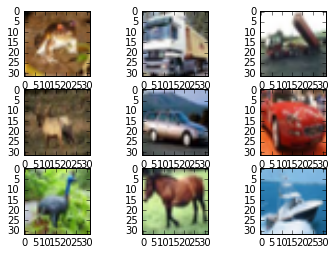

In [3]:
for i in range(0, 9):
    plt.subplot(331 + i)
    img = np.rollaxis(X_train[i], 0, 3)  # change axis ordering to [height][width][chanel]
    plt.imshow(img)
plt.show()

Preprocess the dataset

In [4]:
# normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# one hot vector
Y_train = np_utils.to_categorical(Y_train.reshape(Y_train.shape[0],))
Y_val = np_utils.to_categorical(Y_val.reshape(Y_val.shape[0], ))
num_classes = Y_val.shape[1]

## 2. Build CNN

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras import backend
backend.set_image_dim_ordering('th')

In [6]:
# fix random seed
seed = 7
np.random.seed(seed)

In [7]:
# definea a CNN model
def create_cnn():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(3, 32, 32), border_mode='same',
                            activation='relu', W_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model


# build the model
cnn = create_cnn()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 32, 32)    896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 32, 32, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 32, 16, 16)    0           dropout_1[0][0]                  
____________________________________________________________________________________________________
flatten_1 (Flatten)              (None, 8192)          0           maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [12]:
# fit model
cnn.fit(X_train, Y_train, validation_data=(X_val, Y_val), nb_epoch=1, batch_size=32, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 661s - loss: 1.2918 - acc: 0.5374 - val_loss: 1.2062 - val_acc: 0.5833


In [13]:
# evaluate model
scores = cnn.evaluate(X_val, Y_val, verbose=0)
print('Val_Acc: %.2f%%'%(scores[1]*100))

Val_Acc: 58.33%
